In [1]:
#Pasul 1. Citirea bibliotecilor necesare și vizualizarea informației despre mapa cu imagini
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from tqdm import tqdm

In [2]:
import kagglehub

path = kagglehub.dataset_download("utkarshsaxenadn/car-vs-bike-classification-dataset")
data_path = os.path.join(path, os.listdir(path)[0])

categories = os.listdir(data_path)
print("Categorii:", categories)

Categorii: ['Car', 'Bike']


In [3]:
car_path = os.path.join(data_path, "Car")
bike_path = os.path.join(data_path, "Bike")

print(f"Nr. imagini cu mașini: {len(os.listdir(car_path))}")
print(f"Nr. imagini cu motociclete: {len(os.listdir(bike_path))}")

Nr. imagini cu mașini: 2000
Nr. imagini cu motociclete: 2000


In [4]:
#Pasul 2. Citirea primelor 10 imagini din fișier
DataPath = pathlib.Path(data_path)
all_path_objects = list(DataPath.glob("*/*.jpg")) + list(DataPath.glob("*/*.jpeg")) + list(DataPath.glob("*/*.png"))
all_path = [str(p) for p in all_path_objects if "Car-Bike-Dataset" in str(p)]
all_path[:10]

['/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (2).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (23).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (43).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (26).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (11).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (46).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (45).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (28).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (17).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (52).jpg']

In [5]:
#Pasul 3. Amestecarea imaginilor în fișier cu scopul evitării antrenării rețelei doar pe un anumit tip de imagini
from random import shuffle

shuffle(all_path)
all_path[:10]

['/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (469).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (587).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (65).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (814).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (105).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (820).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (22).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/images (128).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (964).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1464).jpeg']

In [6]:
#Pasul 4. Decodarea imaginilor
def TestImageQuality(all_path):
    new_all_path = []
    for path in tqdm(all_path):
        try:
            image_bytes = tf.io.read_file(path)
            try:
                _ = tf.io.decode_jpeg(image_bytes, channels=3)
                new_all_path.append(path)
            except tf.errors.InvalidArgumentError:
                try:
                    _ = tf.io.decode_png(image_bytes, channels=3)
                    new_all_path.append(path)
                except tf.errors.InvalidArgumentError:
                    continue
        except tf.errors.NotFoundError:
            continue
    return new_all_path

all_path = TestImageQuality(all_path)
all_path[:10]

100%|██████████| 3996/3996 [00:36<00:00, 109.28it/s]


['/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (469).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (587).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (65).jpg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (814).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (105).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (820).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (22).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/images (128).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (964).jpeg',
 '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1464).jpeg']

In [7]:
#Pasul 5. Obținerea etichetelor și transformarea lor în 0 și 1
def get_label(image_path):
  return image_path.split("/")[-2]

all_labels = list(map(lambda x: get_label(x), all_path))
all_labels[:10]

['Car', 'Car', 'Bike', 'Car', 'Bike', 'Car', 'Bike', 'Bike', 'Bike', 'Car']

In [8]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [9]:
#Pasul 6.  Crearea setului de antrenament
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(all_path, all_labels)

Train_paths[:10], Train_labels[:10]

(['/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1534).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (188).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1620).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1476).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (580).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/images (8).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/Bike (430).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1612).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (1896).jpeg',
  '/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike/images (124).jpeg'],
 array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0]))

In [10]:
def load(image_path, label):
    image = tf.io.read_file(image_path)
    try:
        image = tf.io.decode_jpeg(image, channels=3)
    except tf.errors.InvalidArgumentError:
        try:
            image = tf.io.decode_png(image, channels=3)
        except tf.errors.InvalidArgumentError:
            raise ValueError(f"Nu s-a putut decoda imaginea ca JPEG sau PNG: {image_path.decode('utf-8')}")
    return image, label

In [11]:
IMG_SIZE = 224
BATCH_SIZE = 128

resize = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=(-0.3, -0.2))
])

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train=True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

    dataset = dataset.map(lambda image, label: load(image, label), num_parallel_calls=AUTOTUNE)
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()

    return dataset

In [13]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths, Train_labels, train=True)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 396 ms, sys: 26.2 ms, total: 422 ms
Wall time: 413 ms
(128, 224, 224, 3)
(128,)


Bike


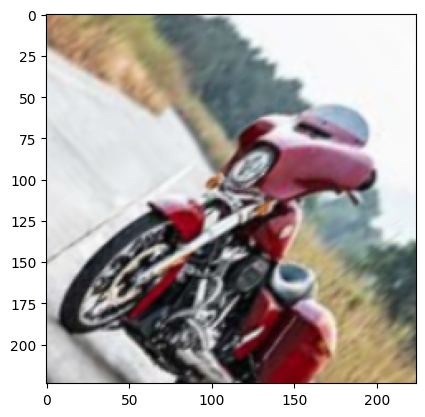

In [14]:
#Pasul 7. Vizualizarea a câte un exemplu din fiecare clasă : car, bike (din setul de antrenament) pentru a ne asigura că este citit corect
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [15]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 50.6 ms, sys: 0 ns, total: 50.6 ms
Wall time: 50.3 ms
(128, 224, 224, 3)
(128,)


Bike


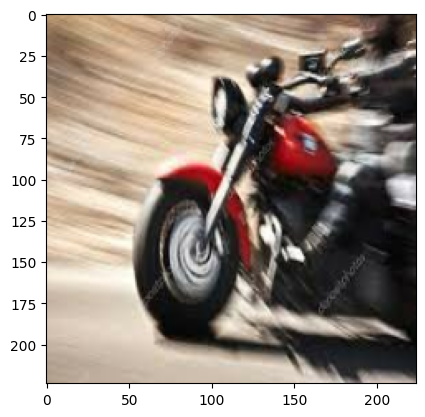

In [16]:
# View a sample training image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [17]:
#Pasul 8. Crearea modelului rețelei neuronale convoluționale
# Model part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPool2D

model = Sequential()

# Block 1
model.add(Conv2D(input_shape=(224, 224, 3), padding='same', filters=32, kernel_size=(7, 7)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(filters=64, padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D()) # Defaults to (2, 2) pool_size
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Global Max Pooling
model.add(GlobalMaxPool2D())

# Dense Layers
model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1)) # Assuming binary classification (e.g., Car vs. Not Car)
model.add(Activation('sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#Pasul 9. Vizualizare informații despre modelul creat
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 108, 108, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,084,097 (4.14 MB)

 Trainable params: 1,082,625 (4.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [19]:
#Pasul 10. Compilare și antrenarea modelului
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
#Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(Val_paths)//BATCH_SIZE
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1079s 46s/step - accuracy: 0.5573 - loss: 2.1616 - val_accuracy: 0.5045 - val_loss: 2.2448
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1043s 46s/step - accuracy: 0.7163 - loss: 0.5805 - val_accuracy: 0.4911 - val_loss: 2.4314
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1010s 44s/step - accuracy: 0.7333 - loss: 0.5559 - val_accuracy: 0.5022 - val_loss: 1.6452
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1018s 44s/step - accuracy: 0.7791 - loss: 0.4577 - val_accuracy: 0.5592 - val_loss: 1.0656
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1043s 46s/step - accuracy: 0.8067 - loss: 0.4237 - val_accuracy: 0.7165 - val_loss: 0.5694
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1023s 45s/step - accuracy: 0.8236 - loss: 0.3768 - val_accuracy: 0.5748 - val_loss: 0.8824
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1042s 45s/step - accuracy: 0.8440 - loss: 0.3570 - val_accuracy: 0.7533 - val_loss: 0.4806
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1042s 45s/step - accuracy: 0.8631 - loss: 0.3273 - val_accu

In [21]:
#Pasul 11. Evaluarea modelului
loss, acc = model.evaluate(val_dataset)

print("Testing ACC: ", acc)
print("Testing Loss: ", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.8174 - loss: 0.4265
Testing ACC:  0.8128128051757812
Testing Loss:  0.43726396560668945


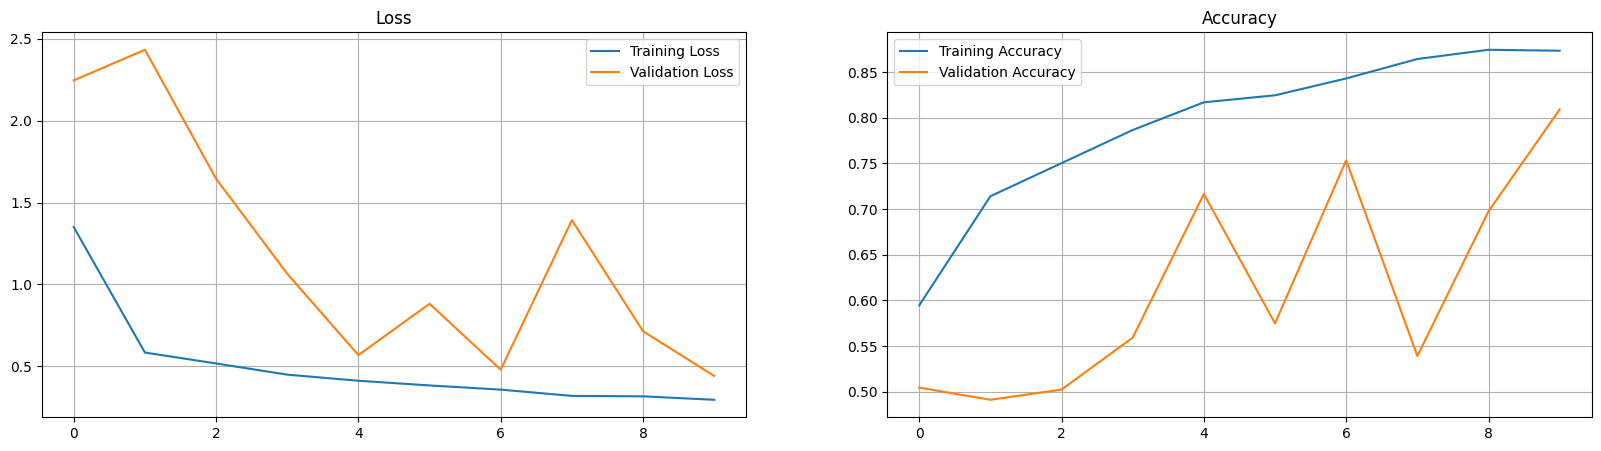

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.grid()
plt.legend()

plt.show()

In [24]:
#Pasul 12. Comparați rezultatele obținute testând rețele precum ResNet și Inception. Comentați rezultatul obținut
#Testarea cu ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

num_classes = 2

# Crează modelul de bază ResNet50 (fără stratul de clasificare inclus)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Blochează straturile pre-antrenate pentru a nu fi antrenate din nou (opțional)
for layer in base_model.layers:
    layer.trainable = False

# Adaugă straturile tale de clasificare
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Creează modelul final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilează modelul
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# Antrenează modelul (folosind dataset-urile tale train_dataset și val_dataset)
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths) // BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(Val_paths) // BATCH_SIZE
)

# Evaluează modelul
loss, acc = model.evaluate(val_dataset)
print("Testing ACC: ", acc)
print("Testing Loss: ", loss)

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 747s 32s/step - accuracy: 0.7319 - loss: 1.9094 - val_accuracy: 0.9609 - val_loss: 0.1470
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 741s 33s/step - accuracy: 0.9586 - loss: 0.1341 - val_accuracy: 0.9788 - val_loss: 0.0576
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 742s 33s/step - accuracy: 0.9770 - loss: 0.0697 - val_accuracy: 0.9866 - val_loss: 0.0416
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 742s 33s/step - accuracy: 0.9808 - loss: 0.0571 - val_accuracy: 0.9833 - val_loss: 0.0444
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 712s 31s/step - accuracy: 0.9809 - loss: 0.0492 - val_accuracy: 0.9855 - val_loss: 0.0447
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 742s 33s/step - accuracy: 0.9810 - loss: 0.0524 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 713s 31s/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9877 - val_loss: 0.0404
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 741s 33s/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

AUTOTUNE = tf.data.experimental.AUTOTUNE
IMG_SIZE_INCEPTION = 299
BATCH_SIZE = 32
num_classes = 2

def decode_image(image_data):
    try:
        image = tf.image.decode_jpeg(image_data, channels=3)
    except tf.errors.InvalidArgumentError:
        image = tf.image.decode_png(image_data, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image

def load(image_path, label):
    image = tf.io.read_file(image_path)
    image = decode_image(image)
    image = tf.image.resize(image, [IMG_SIZE_INCEPTION, IMG_SIZE_INCEPTION])
    return image, label

def get_dataset(paths, labels, train=True):
    path_label_dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = path_label_dataset.map(load, num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(BATCH_SIZE)
    if train:
        dataset = dataset.repeat()
    return dataset

# Creează dataset-urile
train_dataset = get_dataset(Train_paths, Train_labels, train=True)
val_dataset = get_dataset(Val_paths, Val_labels, train=False)

# Testarea cu InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE_INCEPTION, IMG_SIZE_INCEPTION, 3))

# Blochează straturile pre-antrenate
for layer in base_model.layers:
    layer.trainable = False

# Adaugă straturile tale de clasificare
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Creează modelul final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilează modelul
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# Antrenează modelul
epochs = 10
steps_per_epoch = len(Train_paths) // BATCH_SIZE if Train_paths else 1
validation_steps = len(Val_paths) // BATCH_SIZE if Val_paths else 1

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# Evaluează modelul
loss, acc = model.evaluate(val_dataset)
print("Testing ACC: ", acc)
print("Testing Loss: ", loss)

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_287 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_287[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_289      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_288 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_289[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_288[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_290      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_289 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_290[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_289[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_291      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 73, 73,    │          0 │ activation_291[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_290 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_16… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_290[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_292      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_291 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_292[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_291[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_293      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 987s 10s/step - accuracy: 0.9445 - loss: 0.1354 - val_accuracy: 0.9879 - val_loss: 0.0473
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 965s 10s/step - accuracy: 0.9960 - loss: 0.0138 - val_accuracy: 0.9859 - val_loss: 0.0555
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 967s 10s/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9950 - val_loss: 0.0152
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 978s 11s/step - accuracy: 0.9920 - loss: 0.0295 - val_accuracy: 0.9960 - val_loss: 0.0159
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 981s 11s/step - accuracy: 0.9940 - loss: 0.0160 - val_accuracy: 0.9970 - val_loss: 0.0107
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 982s 11s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9940 - val_loss: 0.0163
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 982s 11s/step - accuracy: 1.0000 - loss: 4.9452e-04 - val_accuracy: 0.9980 - val_loss: 0.0103
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 982s 11s/step - accuracy: 1.0000 - loss: 2.0925e-04 - val_accu

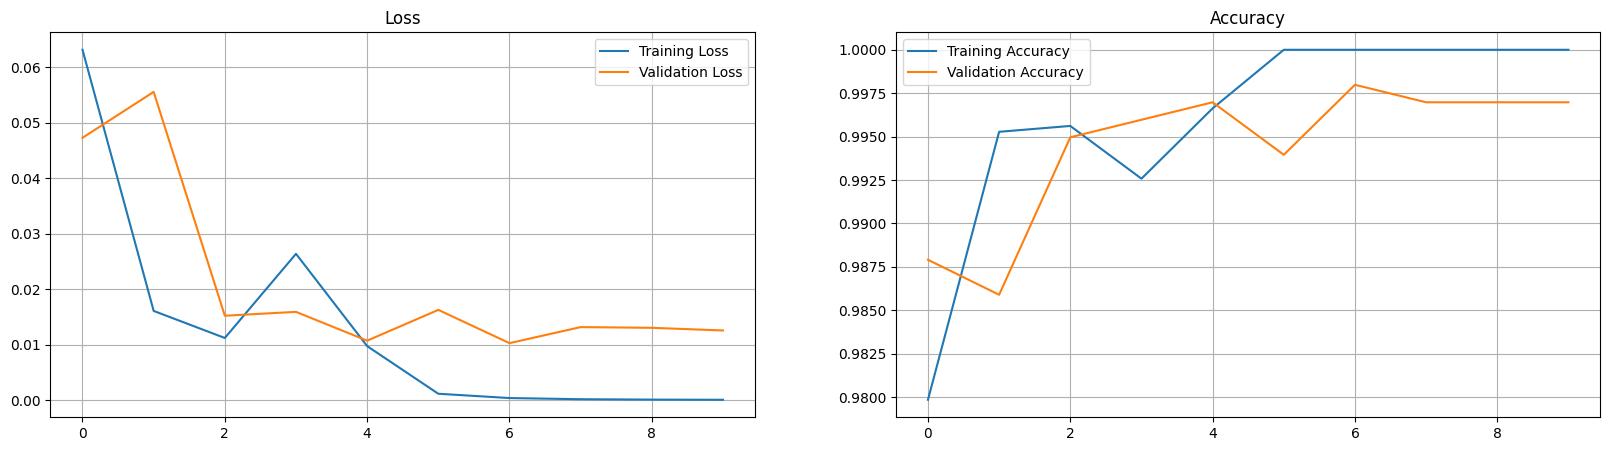

In [30]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.grid()
plt.legend()

plt.show()